# Re-entering high students & passing scores on the Reading, Language and Math high school equivalency test (by most recent start date) 

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
# Store CSV into DataFrame
csv_file = "CorpsNet Data.csv"
CorpsNet_Data_df = pd.read_csv(csv_file)
CorpsNet_Data_df.head()

,Unnamed: 0,Test Date,Score,Is Passing Score,Last Name,First Name,Start Date,Test,Test Grouping
0,View/Edit,10/24/2014,226.0,False,Aaron,Adriana,Jan-06-2014,Math,NWEA
1,View/Edit,10/6/2014,0.0,False,Aaron,Adriana,Jan-06-2014,Mural,Seminars
2,View/Edit,9/30/2014,100.0,True,Aaron,Adriana,Jan-06-2014,Corpsmember Evaluation,Evaluation
3,View/Edit,9/2/2014,100.0,True,Aaron,Adriana,Jan-06-2014,Science,Seminars
4,View/Edit,8/31/2014,100.0,True,Aaron,Adriana,Jan-06-2014,Corpsmember Evaluation,Evaluation


In [3]:
# Clean DataFrame
# Create new data frame with select columns, combine 'First' and 'Last' name to one column, & select only NWEA scores.
CorpsNet_Data_df = CorpsNet_Data_df[['Test Date', 'Score', 'Is Passing Score', 'Last Name', 'First Name', 'Start Date', 'Test', 'Test Grouping']].copy()
CorpsNet_Data_df["Name"] = CorpsNet_Data_df["Last Name"] + CorpsNet_Data_df["First Name"] 
CorpsNet_Data_df = CorpsNet_Data_df[['Name','Test Date', 'Score', 'Is Passing Score', 'Start Date', 'Test', 'Test Grouping']].copy()
NWEA_df = CorpsNet_Data_df[CorpsNet_Data_df['Test Grouping'] == 'NWEA']
NWEA_df.head()

,Name,Test Date,Score,Is Passing Score,Start Date,Test,Test Grouping
0,AaronAdriana,10/24/2014,226.0,False,Jan-06-2014,Math,NWEA
6,AaronAdriana,7/30/2014,232.0,False,Jan-06-2014,Math,NWEA
14,AaronAdriana,4/25/2014,232.0,False,Jan-06-2014,Math,NWEA
15,AaronAdriana,4/23/2014,231.0,True,Jan-06-2014,Language,NWEA
30,AaronAdriana,1/13/2014,221.0,False,Jan-06-2014,Math,NWEA


In [4]:
# Convert 'Test Date' and 'Start Date' from objects to datetime
NWEA_df[["Test Date", "Start Date"]] = NWEA_df[["Test Date", "Start Date"]].astype('datetime64[ns]')
NWEA_df.dtypes
NWEA_df.head()

C:\Users\314ca\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Name,Test Date,Score,Is Passing Score,Start Date,Test,Test Grouping
0,AaronAdriana,2014-10-24,226.0,False,2014-01-06,Math,NWEA
6,AaronAdriana,2014-07-30,232.0,False,2014-01-06,Math,NWEA
14,AaronAdriana,2014-04-25,232.0,False,2014-01-06,Math,NWEA
15,AaronAdriana,2014-04-23,231.0,True,2014-01-06,Language,NWEA
30,AaronAdriana,2014-01-13,221.0,False,2014-01-06,Math,NWEA


In [ ]:
# newdb = []
# for row in NWEA_df.iterrows():
#     if row[1]['Is Passing Score'] == True:
#         row[1]['Days until Passed'] = row[1]['Test Date'] - row[1]['Start Date']
# #         print(row)

In [5]:
# Calculate days until passed test
NWEA_df['Days until Passed'] = ''
Days_df = NWEA_df.loc[NWEA_df['Is Passing Score'] == True]
NWEA_df['Days until Passed'] = (Days_df['Test Date'] - Days_df['Start Date']).apply(lambda x: x.days)

C:\Users\314ca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\314ca\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# Remove unpassed tests
NWEA_df = NWEA_df.dropna()
NWEA_df

,Name,Test Date,Score,Is Passing Score,Start Date,Test,Test Grouping,Days until Passed
15,AaronAdriana,2014-04-23,231.0,True,2014-01-06,Language,NWEA,107.0
31,AaronAdriana,2014-01-13,231.0,True,2014-01-06,Reading,NWEA,7.0
52,AaronJessica,2009-02-12,231.0,True,2009-02-18,Math,NWEA,-6.0
62,AbarcaLuis,2009-12-07,221.0,True,2009-09-16,Math,NWEA,82.0
141,AbramsTwanish,2013-01-10,232.0,True,2013-01-07,Math,NWEA,3.0
142,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Reading,NWEA,3.0
143,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Language,NWEA,3.0
161,AcostaAlicia,2011-05-04,226.0,True,2011-05-02,Language,NWEA,2.0
223,AdamsKiauna,2012-06-14,251.0,True,2018-04-10,Math,NWEA,-2126.0
224,AdamsKiauna,2012-06-14,240.0,True,2018-04-10,Reading,NWEA,-2126.0


In [7]:
# Remove negative values 
NWEA_positive_df = NWEA_df[(NWEA_df['Days until Passed']>0)]
NWEA_positive_df

,Name,Test Date,Score,Is Passing Score,Start Date,Test,Test Grouping,Days until Passed
15,AaronAdriana,2014-04-23,231.0,True,2014-01-06,Language,NWEA,107.0
31,AaronAdriana,2014-01-13,231.0,True,2014-01-06,Reading,NWEA,7.0
62,AbarcaLuis,2009-12-07,221.0,True,2009-09-16,Math,NWEA,82.0
141,AbramsTwanish,2013-01-10,232.0,True,2013-01-07,Math,NWEA,3.0
142,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Reading,NWEA,3.0
143,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Language,NWEA,3.0
161,AcostaAlicia,2011-05-04,226.0,True,2011-05-02,Language,NWEA,2.0
290,AguelarEmilio,2013-07-29,224.0,True,2013-03-18,Reading,NWEA,133.0
292,AguelarEmilio,2013-07-16,220.0,True,2013-03-18,Language,NWEA,120.0
367,AguirreKeelie,2018-02-15,231.0,True,2018-02-13,Reading,NWEA,2.0


In [26]:
# Set Index
NWEA_positive_df.reset_index(level=0, inplace=True)
NWEA_positive_df

,index,Name,Test Date,Score,Is Passing Score,Start Date,Test,Test Grouping,Days until Passed
0,15,AaronAdriana,2014-04-23,231.0,True,2014-01-06,Language,NWEA,107.0
1,31,AaronAdriana,2014-01-13,231.0,True,2014-01-06,Reading,NWEA,7.0
2,62,AbarcaLuis,2009-12-07,221.0,True,2009-09-16,Math,NWEA,82.0
3,141,AbramsTwanish,2013-01-10,232.0,True,2013-01-07,Math,NWEA,3.0
4,142,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Reading,NWEA,3.0
5,143,AbramsTwanish,2013-01-10,220.0,True,2013-01-07,Language,NWEA,3.0
6,161,AcostaAlicia,2011-05-04,226.0,True,2011-05-02,Language,NWEA,2.0
7,290,AguelarEmilio,2013-07-29,224.0,True,2013-03-18,Reading,NWEA,133.0
8,292,AguelarEmilio,2013-07-16,220.0,True,2013-03-18,Language,NWEA,120.0
9,367,AguirreKeelie,2018-02-15,231.0,True,2018-02-13,Reading,NWEA,2.0


In [29]:
# Check data type
NWEA_positive_df.dtypes

index                         int64
Name                         object
Test Date            datetime64[ns]
Score                       float64
Is Passing Score               bool
Start Date           datetime64[ns]
Test                         object
Test Grouping                object
Days until Passed           float64
dtype: object

In [27]:
# Convert Data frame to CSV
NWEA_positive_df.to_csv('NWEA_Start_Date.csv')

In [8]:
# Find average days to pass
NWEA_average_df = NWEA_positive_df.describe()
NWEA_average_df

,Score,Days until Passed
count,1034.000000,1034.000000
mean,234.388685,204.271760
std,11.258251,232.147153
min,215.000000,1.000000
25%,225.000000,10.000000
50%,233.000000,112.000000
75%,240.000000,303.750000
max,284.000000,1672.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x20b15dfa3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x20b161fee80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x20b161fe780>],
 'medians': [<matplotlib.lines.Line2D at 0x20b16214be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b16214c88>],
 'means': []}

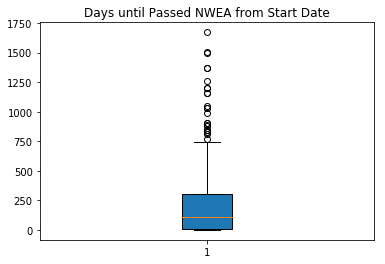

In [9]:
# Make box plot to see spread of data
data = NWEA_positive_df['Days until Passed']
fig1, ax1 = plt.subplots()
ax1.set_title('Days until Passed NWEA from Start Date')
ax1.boxplot(data, patch_artist=True)


In [24]:
# Find average days to pass each type of test
NWEA_group = NWEA_positive_df.groupby(['Test'])['Days until Passed'].mean()
NWEA_group

Test
Language    229.782090
Math        204.193452
Reading     180.801653
Name: Days until Passed, dtype: float64

In [25]:
# Find average score for each type of test
NWEA_group = NWEA_positive_df.groupby(['Test'])['Score'].mean()
NWEA_group

Test
Language    232.040896
Math        237.907738
Reading     233.298072
Name: Score, dtype: float64